# Gradient Boosting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
X = np.random.randn(500)*1.1
y = X**3 + 9*X**2 + 2*X + np.random.randn(500)*10

In [51]:
df = pd.DataFrame()

In [52]:
df['x'] = X
df['y'] = y

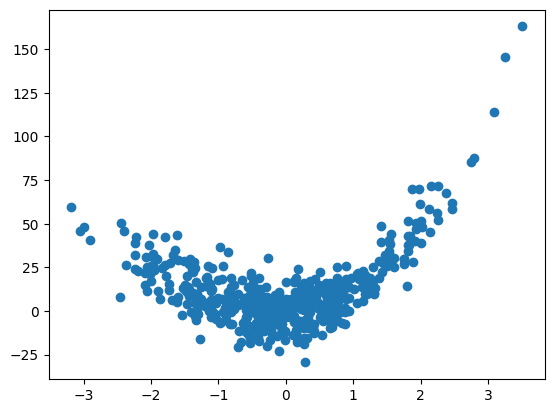

In [53]:
plt.scatter(X, y)

In [ ]:
# 1st model always remain mean for regression
df['pred1'] = df['y'].mean()

In [56]:
df['residual1'] = df['y'] - df['pred1']

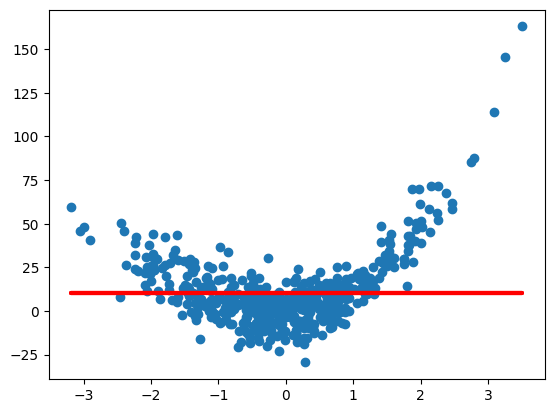

In [62]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color='red', linewidth=3)

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# max_leaf_nodes should be in between 8 to 32
dtr1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [ ]:
dtr1.fit(df['x'].values.reshape(500, 1), df['residual1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

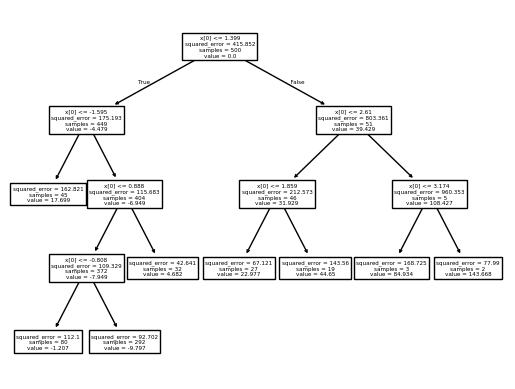

In [69]:
from sklearn.tree import plot_tree
plot_tree(dtr1)
plt.show()

In [72]:
x_test = np.linspace(-4, 4, 500)
y_pred = 10.550358 + dtr1.predict(x_test.reshape(-1, 1))

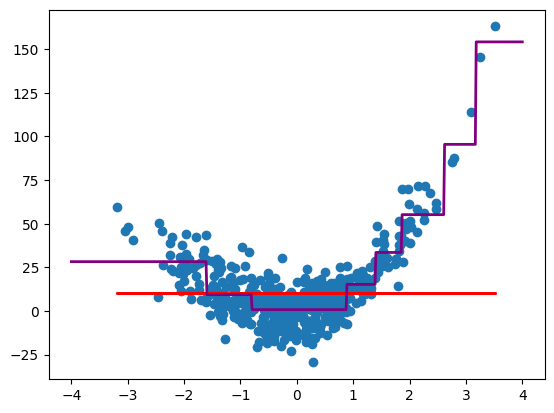

In [82]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['pred1'], color='red', linewidth=2)
plt.plot(x_test, y_pred,color='purple', linewidth=2)

In [83]:
df['pred2'] = 10.550358 + dtr1.predict(df['x'].values.reshape(-1, 1))

In [85]:
df['residual2'] = df['y'] - df['pred2']

In [87]:
# train 3rd model

dtr2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtr2.fit(df['x'].values.reshape(500, 1), df['residual2'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

In [90]:
y_pred = 10.550358 + sum(reg.predict(x_test.reshape(-1, 1)) for reg in [dtr1, dtr2])

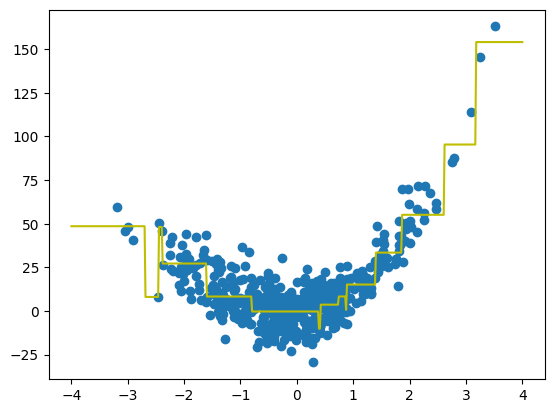

In [92]:
plt.scatter(df['x'],df['y'])
plt.plot(x_test, y_pred, color='y')

In [86]:
df.head()

,x,y,pred1,residual1,pred2,residual2
0,-1.154800,16.455479,10.550358,5.905121,9.343573,7.111907
1,0.029027,3.650254,10.550358,-6.900104,0.753734,2.896521
2,1.087176,18.107798,10.550358,7.557440,15.232047,2.875751
3,1.071655,21.641140,10.550358,11.090782,15.232047,6.409094
4,2.011564,51.746295,10.550358,41.195937,55.200771,-3.454476
